In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from implementations import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# import some data to test the functions
from helpers import *

ids_tr,predictions_tr,data_tr, ids_te,data_te = load_boson_data()

y=predictions_tr
x, mean_x, std_x = standardize(data)

y,tx = build_model_data(x,y)

y.shape, x.shape, tx.shape, data_tr.shape

((99,), (99, 30), (99, 31), (99, 30))

(3318.29877728571,
 array([ 0.36363636, -0.82968456,  2.31942266,  0.24506221, -4.4594937 ,
        -5.71182766, -5.43609559, -5.71187696,  3.6375749 , -2.06825232,
        -5.74126416, -0.59684369, -3.92640731, -5.71236191, -0.78440623,
         0.76452012,  0.14481384, -2.13139949,  0.32086912,  0.48965793,
        -1.04739775,  0.54696811, -5.13727859, -6.05694593, -5.32055126,
        -5.19619699, -5.19574925, -5.72220848, -5.71278144, -5.71218133,
        -5.68360329]))

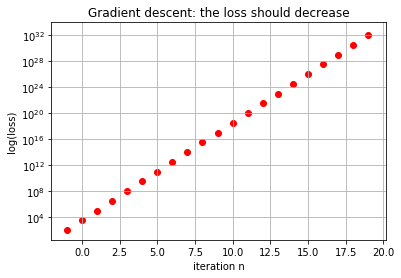

In [117]:
# gradient descent
initial_w = np.zeros(tx.shape[1])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, print_output=False, plot_losses=True)
loss,w

ValueError: shapes (1,31) and (2,) not aligned: 31 (dim 1) != 2 (dim 0)

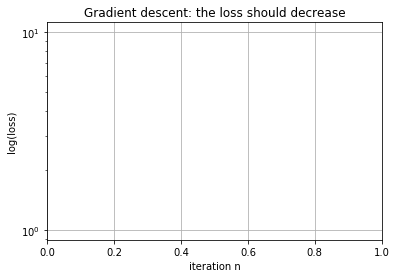

In [118]:
# stochastic gradient descent
# gradient descent
initial_w = np.array([0, 0])
max_iters = 20
gamma = 0.5
loss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1, print_output=False, plot_losses=True)
loss,w

In [48]:
# analityc solution
least_squares(y, tx)

(15.3858878688294, array([ 73.293922  ,  13.47971243]))

In [49]:
# ridge regression to choose smaller weights (the simpler the model the better)
lambda_ = 0.02 # how to properly choose lambda?
ridge_regression(y, tx, lambda_)

(19.493655361271703, array([ 70.474925  ,  12.96126196]))

(88823.296494132577, array([ 0.25340497,  2.71506301, -7.40856042]))

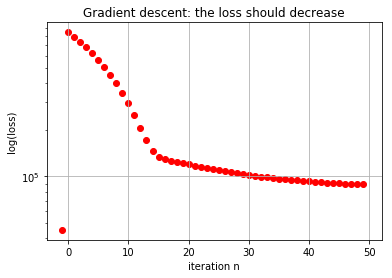

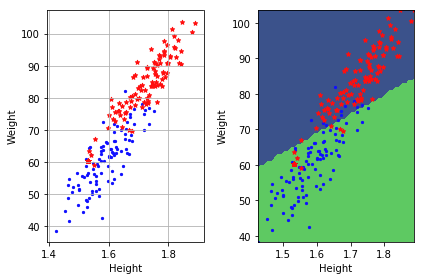

In [50]:
# logistic regression (it is gradient descent with a different loss function)
from helpers import sample_data, load_data
from plots import visualization

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

tx = build_poly(x, 1)
initial_w = np.ones(tx.shape[1])
max_iters = 50
gamma = 0.2
minloss, w = gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=-1, print_output=False, plot_losses=True, costfunc=CostFunction.PROB)
# w = np.array(w).reshape(-1, 1)
visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
minloss, w